In [1]:
from _train import data, X, y, pipeline, pipeline_for_encoded_data,encoded_X
import pandas as pd
import sklearn
import numpy as np
from lime import lime_tabular
import dalex as dx
import random
model = pipeline
from sklearn.metrics import roc_auc_score


Index(['date_birth', 'date_start_treatment', 'date_surgery', 'alive', 'sex',
       'tumor_size_x', 'tumor_size_y', 'tumor_size_z',
       'histopatological_diagnosis', 'years_smoking', 'lung_cancer_in_family',
       'symptoms', 'stadium_uicc', 'age', 'time_to_surgery'],
      dtype='object')


In [11]:
# random.seed(123)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.80)
model.fit(X_train, y_train)
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
# model.predict_proba(X_test)[:,1]

0.7914394236884081

In [3]:
pd.DataFrame(X_test.iloc[5,:]).T

,date_birth,date_start_treatment,date_surgery,sex,tumor_size_x,tumor_size_y,tumor_size_z,histopatological_diagnosis,years_smoking,lung_cancer_in_family,symptoms,stadium_uicc,age,time_to_surgery
2611,1940-07-30,2006-09-01,2007-07-27,M,0.5,1,0.5,rak płaskonabłonkowy,25,NIE,NIE,IA2,66,1


In [59]:
obs =X_test.iloc[X_test.index==,:]

In [12]:
pd.DataFrame(X_test.loc[6164,:]).T

,date_birth,date_start_treatment,date_surgery,sex,tumor_size_x,tumor_size_y,tumor_size_z,histopatological_diagnosis,years_smoking,lung_cancer_in_family,symptoms,stadium_uicc,age,time_to_surgery
6164,1966-01-21,2007-06-20,2009-01-09,K,1.7,1.7,1.7,rak gruczołowy,20,NIE,NIE,IB,41,2


In [15]:
exp.predict(obs)
# obs
# Shap(5), exp.predict(obs), obs, CeterisParibus(5)



array([0.388553])

In [75]:
obs

date_birth                        1966-01-21
date_start_treatment              2007-06-20
date_surgery                      2009-01-09
sex                                        K
tumor_size_x                             1.7
tumor_size_y                             1.7
tumor_size_z                             1.7
histopatological_diagnosis    rak gruczołowy
years_smoking                             20
lung_cancer_in_family                    NIE
symptoms                                 NIE
stadium_uicc                              IB
age                                       41
time_to_surgery                            2
Name: 6164, dtype: object

In [14]:
# create an explainer for the model:
exp = dx.Explainer(model, X, y, label = "Lungs Cancer Mortality MLP Pipeline")

obs = pd.DataFrame(X_test.iloc[5,:]).T

# BreakDown and BreakDownInt methods
def BreakDown(number_of_observation):
    bd = exp.predict_parts(pd.DataFrame(X_test.loc[number_of_observation,:]).T, type='break_down')
    bd.plot()
    
def BreakDownI(number_of_observation):
    bd_interactions = exp.predict_parts(pd.DataFrame(X_test.loc[number_of_observation,:]).T,
                                        type='break_down_interactions')
    bd_interactions.plot()
    



#SHAP
def Shap(number_of_observation):
    sh = exp.predict_parts(pd.DataFrame(X_test.loc[number_of_observation,:]).T, type='shap', B = 20)
    sh.plot(bar_width = 16)


# sh.result.loc[sh.result.B == 0, ]


# #lime
# # preparing categorical_features for lime method
# categorical_features = [3,7,9,10]
# categorical_names = {}

# categorical_names = {}
# for feature in categorical_features:
#     Y = X.copy()
    
#     le = sklearn.preprocessing.LabelEncoder()
#     Y.iloc[:, feature] = Y.iloc[:, feature].astype(str)
#     le.fit(Y.iloc[:, feature])
# #   Y.iloc[:, feature] = le.transform(Y.iloc[:, feature])
#     categorical_names[feature] = le.classes_
   
# stadia = [float('nan'), 'IA1', 'IA2', 'IA3', 'IB', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IVA', 'IVB']
# categorical_names.update({11:np.array(stadia, dtype=object)})
# categorical_features2 = [3,7,9,10,11]
# encoder =  lambda x: model.named_steps["encoder"].transform(x)
# scaler = lambda x: model.named_steps["scaler"].transform(x) 
# predict_fn = lambda x: model.named_steps["nn"].predict_proba(x)
# X_train_enc = encoder(X_train)
# X_test_enc = encoder(X_test)
# X_train_sc = scaler(X_train_enc)
# X_test_sc = scaler(X_test_enc)

# explainer_lime = lime_tabular.LimeTabularExplainer(X_train_sc,class_names=["NO", "YES"],
#                                                    feature_names=X_train.columns,
#                                                   categorical_features=categorical_features2,
#                                                     categorical_names=categorical_names,
#                                                    verbose=False)
# def Lime(number_of_observation):
#     exp_lime = explainer_lime.explain_instance(X_test_sc[number_of_observation],predict_fn)
#     exp_lime.show_in_notebook(show_table=True, show_all=False)
    
# Lime(4)
CeterisParibus(6164)


Preparation of a new explainer is initiated

  -> target variable   :  Lungs Cancer Mortality MLP Pipeline
  -> data              : 29784 rows 14 cols
  -> target variable   :  Argument 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 29784 values
  -> predict function  : <function yhat.<locals>.<lambda> at 0x7f65f1343830> will be used
  -> predicted values  : min = 0.03708601125825992, mean = 0.5945633947360828, max = 0.9984626039492346
  -> residual function : difference between y and yhat
  -> residuals         : min = -0.9901517751236424, mean = -0.006630276283222146, max = 0.9477909096636647
  -> model_info        : package sklearn

A new explainer has been created!


NameError: name 'CeterisParibus' is not defined

In [45]:
def CeterisParibus(number_of_observation):
    cp = exp.predict_profile(pd.DataFrame(X_test.loc[number_of_observation,:]).T)
    cp.plot(variables=["stadium_uicc", "lung_cancer_in_family", "years_smoking"], facet_ncol=3)
    
CeterisParibus(6164)

Calculating ceteris paribus!: 100%|██████████| 14/14 [00:00<00:00, 42.64it/s]
/home/user/anaconda3/lib/python3.7/site-packages/dalex/instance_level/_ceteris_paribus/object.py:105: UserWarning:

'variable_type' changed to 'categorical' due to lack of numerical variables.



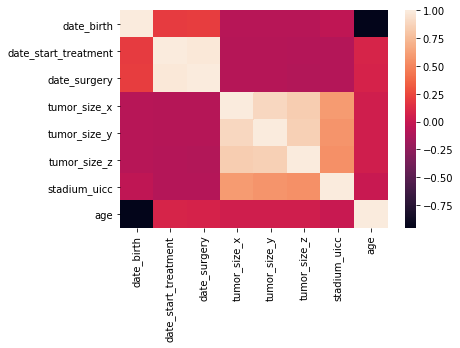

In [44]:
import seaborn as sns
encoder =  lambda x: model.named_steps["encoder"].transform(x)
scaler = lambda x: model.named_steps["scaler"].transform(x) 
X_train_enc = encoder(X_train)
X_test_enc = encoder(X_test)
X_train_sc = scaler(X_train_enc)
X_test_sc = scaler(X_test_enc)
b = X_test_sc[:,[0,1,2,4,5,6,11,12]]
a = pd.DataFrame(b)
a = a.rename(columns= {0:'date_birth',1:'date_start_treatment',2:'date_surgery',3:'tumor_size_x',4: "tumor_size_y",5: "tumor_size_z",6:"stadium_uicc", 7:"age"})
corr =a.corr()
sns.heatmap(corr)


In [31]:
def VariableImp():
    vi = exp.model_parts()
    vi.plot(max_vars=10)
    
VariableImp()


In [52]:
def PartialDp():
    pdp_num = exp.model_profile(type = 'partial')
    pdp_num.result["_label_"] = 'pdp'
    pdp_num.plot()
    
PartialDp()

Calculating ceteris paribus!: 100%|██████████| 14/14 [01:13<00:00,  5.28s/it]
